In [342]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [89]:
import cv2
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import timedelta
import math 

In [90]:
df = pd.read_csv('/home/ziz/school/LOG795/ILS-SUMM-master/object_extraction/data/with_pretreatment_span_3_pfe - with_pretreatment_span_3_pfe.csv',dtype=str)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ziz/school/LOG795/ILS-SUMM-master/object_extraction/data/with_pretreatment_span_3_pfe - with_pretreatment_span_3_pfe.csv'

In [91]:
urls_videos = df.url_noSubs.unique()

In [92]:
df.loc[df['url_noSubs'] == urls_videos[0]].iloc[0].title

'gardening'

In [107]:
for url in urls_videos:
    print(url)
    for index, row in df.loc[df['url_noSubs'] == url].iterrows():
        print(index)


https://www.youtube.com/watch?v=uf4nvO22xOo&ab_channel=PeppaPigSurprise
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
https://www.youtube.com/watch?v=TT0o8peYZeo&ab_channel=PeppaPigSurprise
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
https://www.youtube.com/watch?v=t4lljYv8MR4&ab_channel=PeppaPigSurprise
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
https://www.youtube.com/watch?v=JEzeMV5w6Bk&ab_channel=PeppaPigSurprise
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
https://www.youtube.com/watch?v=ckfy0BYB8lU&ab_channel=PeppaPigSurprise
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
https://www.youtube.com/watch?v=n4gsHAH_q6s&ab_channel=PeppaPigSurprise
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130


In [94]:
dict = {1: 11.92, 2: 12.92, 3: 42.04, 4: 43.04, 5: 44.04, 6: 52.4, 7: 53.4, 8: 54.4, 9: 69.56, 10: 85.28, 11: 86.28, 12: 87.56, 13: 92.6, 14: 93.6, 15: 110.96, 16: 126.36, 17: 127.36, 18: 171.92, 19: 172.92, 20: 196.32, 21: 197.32, 22: 198.32, 23: 243.2, 24: 244.2, 25: 245.12, 26: 246.12, 27: 251.84, 28: 252.84}
print(dict)

{1: 11.92, 2: 12.92, 3: 42.04, 4: 43.04, 5: 44.04, 6: 52.4, 7: 53.4, 8: 54.4, 9: 69.56, 10: 85.28, 11: 86.28, 12: 87.56, 13: 92.6, 14: 93.6, 15: 110.96, 16: 126.36, 17: 127.36, 18: 171.92, 19: 172.92, 20: 196.32, 21: 197.32, 22: 198.32, 23: 243.2, 24: 244.2, 25: 245.12, 26: 246.12, 27: 251.84, 28: 252.84}


In [95]:
start_times = []
end_times = []
for i in range(df.start_time.count()):
    sm = (pd.to_datetime(df.iloc[i]['start_time'])).hour
    ss = (pd.to_datetime(df.iloc[i]['start_time'])).minute
    sms = (pd.to_datetime(df.iloc[i]['start_time'])).second/0.00006

    sts = timedelta(minutes = sm, seconds= ss, microseconds=sms)
    start_times.append(sts.total_seconds())
    
    em = (pd.to_datetime(df.iloc[i]['end_time'])).hour
    es = (pd.to_datetime(df.iloc[i]['end_time'])).minute
    ems = (pd.to_datetime(df.iloc[i]['end_time'])).second/0.00006

    ets = timedelta(minutes = em, seconds= es, microseconds=ems)
    end_times.append(ets.total_seconds())


In [96]:
print(start_times)

[1.7, 23.8, 45.1, 58.9, 70.1, 84.7, 105.7, 118.1, 129.7, 146.3, 158.4, 168.3, 174.4, 193.3, 202.1, 215.2, 237.6, 248.5, 260.1, 2.6, 20.3, 32.1, 38.4, 50.9, 62.6, 72.6, 84.6, 95.0, 107.1, 120.5, 132.4, 145.1, 152.9, 164.0, 179.3, 190.8, 202.4, 210.8, 225.6, 234.5, 245.6, 1.7, 23.6, 35.2, 44.3, 54.3, 67.2, 75.8, 93.3, 105.7, 115.9, 127.9, 138.5, 146.4, 154.8, 168.6, 178.0, 191.0, 205.6, 220.2, 240.8, 255.2, 263.1, 275.4, 1.7, 27.1, 36.0, 44.6, 57.9, 67.9, 76.3, 94.1, 106.7, 113.2, 124.7, 133.9, 149.2, 157.2, 163.7, 177.5, 185.7, 193.9, 203.6, 210.8, 220.4, 234.6, 244.9, 254.8, 262.4, 1.7, 19.9, 31.2, 36.9, 46.6, 69.5, 77.2, 86.4, 102.8, 121.1, 138.5, 151.0, 167.7, 174.4, 181.5, 192.0, 206.7, 216.6, 235.8, 246.8, 254.2, 269.9, 0.0, 29.3, 38.6, 54.0, 62.2, 82.2, 95.1, 108.9, 117.0, 129.4, 146.9, 164.8, 174.1, 187.5, 197.3, 212.6, 219.7, 226.6, 237.6, 255.6]


In [97]:
print(end_times)

[25.4, 49.0, 63.1, 74.2, 87.9, 112.0, 122.4, 134.4, 151.0, 161.5, 169.9, 181.3, 196.4, 205.7, 217.8, 242.1, 252.4, 267.9, 276.0, 17.9, 34.7, 41.5, 45.8, 65.8, 74.2, 87.8, 97.4, 104.6, 123.0, 130.2, 143.8, 152.5, 162.0, 180.4, 194.3, 203.4, 209.4, 226.3, 233.9, 244.6, 298.7, 26.1, 37.6, 49.3, 57.1, 69.6, 80.4, 94.8, 109.1, 122.0, 127.6, 140.6, 148.4, 158.1, 171.2, 182.8, 193.8, 211.3, 224.6, 250.3, 258.4, 268.0, 277.8, 282.1, 29.1, 38.7, 48.6, 61.8, 67.9, 82.4, 97.3, 108.6, 117.4, 127.8, 137.3, 152.8, 160.4, 169.3, 179.6, 187.0, 197.9, 205.3, 213.1, 222.1, 237.9, 248.5, 257.0, 266.8, 280.5, 12.4, 32.3, 39.4, 50.8, 71.8, 80.2, 90.1, 95.8, 124.6, 141.4, 149.5, 169.2, 176.0, 185.7, 194.3, 210.0, 221.3, 238.2, 248.7, 262.3, 274.4, 282.6, 32.4, 43.1, 53.0, 67.0, 82.8, 100.4, 111.3, 121.2, 135.6, 151.4, 159.7, 179.5, 189.9, 200.4, 215.3, 222.3, 227.5, 237.2, 258.5, 263.5]


In [98]:
def get_frame_needed(dict, start_time, end_time):
    frame_needed = []
    for sum_t, real_t in dict.items():
        if start_time <= real_t and real_t <= end_time:
            frame_needed.append(sum_t)
    return frame_needed;

In [99]:
def get_frame_from_video(time, video):
    cap = cv2.VideoCapture(video)
    fps  = cap.get(cv2.CAP_PROP_FPS)
    frame_no = fps * time
    cap.set(1, frame_no)
    res, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame

In [100]:
def get_frame_from_sum(start_time, end_time, video=None):
    
    frame_needed = get_frame_needed(dict, start_time, end_time)
    
    cap = cv2.VideoCapture(video)
    fps  = cap.get(cv2.CAP_PROP_FPS)
    
    frames = []
    for i in frame_needed:
        frames.append(get_frame_from_video(i, video))
        
    cap.release()
    
    return frames

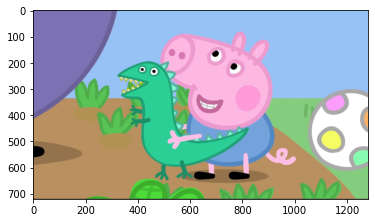

In [111]:
video = '/home/ziz/school/LOG795/ILS-SUMM-master/data/videos_summary/gardening_sum.mp4'

test = get_frame_from_sum(start_times[1], end_times[1],video)

plt.imshow(test[1])


In [447]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

ModuleNotFoundError: No module named 'easygui'

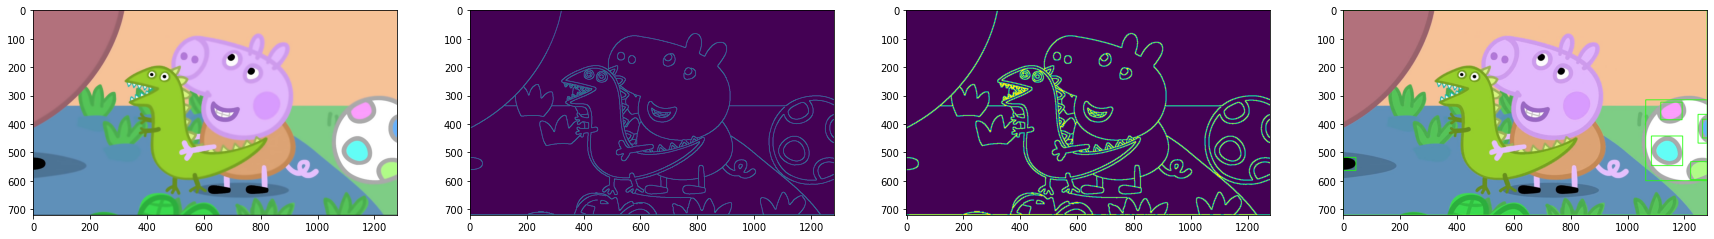

In [543]:
import numpy as np
import matplotlib.pyplot as plt

image = cv2.cvtColor(test[1], cv2.COLOR_BGR2RGB)
original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply filters
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.bilateralFilter(image,9,75,75)

canny = cv2.Canny(blurred, 120, 100)
dilate = cv2.dilate(canny, None, iterations=1)


# Find contours
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Iterate thorugh contours and filter for ROI
image_number = 0
ROIS = []
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
    ROI = original[y:y+h, x:x+w]
    ROIS.append(ROI)
    image_number += 1
    

f, axarr = plt.subplots(1,4)
f.set_size_inches(30, 15)
axarr[0].imshow(blurred)
axarr[1].imshow(canny)
axarr[2].imshow(dilate)
axarr[3].imshow(image)

In [301]:
#== Processing =======================================================================

#== Parameters =======================================================================
BLUR = 21
CANNY_THRESH_1 = 10
CANNY_THRESH_2 = 200
MASK_DILATE_ITER = 10
MASK_ERODE_ITER = 10
MASK_COLOR = (0.0,0.0,1.0) # In BGR format

#-- Read image -----------------------------------------------------------------------
# img = cv2.imread('C:/Temp/person.jpg')
gray = cv2.cvtColor(test[1],cv2.COLOR_BGR2GRAY)

#-- Edge detection -------------------------------------------------------------------
edges = cv2.Canny(gray, CANNY_THRESH_1, CANNY_THRESH_2)
edges = cv2.dilate(edges, None)
edges = cv2.erode(edges, None)
print("edges : {}".format(edges))
#-- Find contours in edges, sort by area ---------------------------------------------
contour_info = []
_, contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Previously, for a previous version of cv2, this line was: 
#  contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Thanks to notes from commenters, I've updated the code but left this note
for c in contours:
    contour_info.append((
        c,
        cv2.isContourConvex(c),
        cv2.contourArea(c),
    ))
contour_info = sorted(contour_info, key=lambda c: c[2], reverse=True)
max_contour = contour_info[0]

#-- Create empty mask, draw filled polygon on it corresponding to largest contour ----
# Mask is black, polygon is white
mask = np.zeros(edges.shape)
cv2.fillConvexPoly(mask, max_contour[0], (255))

#-- Smooth mask, then blur it --------------------------------------------------------
mask = cv2.dilate(mask, None, iterations=MASK_DILATE_ITER)
mask = cv2.erode(mask, None, iterations=MASK_ERODE_ITER)
mask = cv2.GaussianBlur(mask, (BLUR, BLUR), 0)
mask_stack = np.dstack([mask]*3)    # Create 3-channel alpha mask

#-- Blend masked img into MASK_COLOR background --------------------------------------
mask_stack  = mask_stack.astype('float32') / 255.0          # Use float matrices, 
img         = img.astype('float32') / 255.0                 #  for easy blending

masked = (mask_stack * img) + ((1-mask_stack) * MASK_COLOR) # Blend
masked = (masked * 255).astype('uint8')                     # Convert back to 8-bit 

cv2.imshow('img', masked)                                   # Display
cv2.waitKey()


edges : [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]]


ValueError: not enough values to unpack (expected 3, got 2)

In [105]:
count = 0
for i in range(5):
    name = str(i) + 'test'
    print(name)

0test
1test
2test
3test
4test


In [82]:
#Set frame_no in range 0.0-1.0
#In this example we have a video of 30 seconds having 25 frames per seconds, thus we have 750 frames.
#The examined frame must get a value from 0 to 749.
#For more info about the video flags see here: https://stackoverflow.com/questions/11420748/setting-camera-parameters-in-opencv-python
#Here we select the last frame as frame sequence=749. In case you want to select other frame change value 749.
#BE CAREFUL! Each video has different time length and frame rate. 
#So make sure that you have the right parameters for the right video!
time_length = 30.0
fps=25
frame_seq = 749
frame_no = (frame_seq /(time_length*fps))
print(frame_no)
#The first argument of cap.set(), number 2 defines that parameter for setting the frame selection.
#Number 2 defines flag CV_CAP_PROP_POS_FRAMES which is a 0-based index of the frame to be decoded/captured next.
#The second argument defines the frame number in range 0.0-1.0
cap.set(2,frame_no);

#Read the next frame from the video. If you set frame 749 above then the code will return the last frame.
ret, frame = cap.read()

#Set grayscale colorspace for the frame. 
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#Cut the video extension to have the name of the video
my_video_name = video_name.split(".")[0]

#Display the resulting frame
cv2.imshow(my_video_name+' frame '+ str(frame_seq),gray)

#Set waitKey 
cv2.waitKey()

#Store this frame to an image
cv2.imwrite(my_video_name+'_frame_'+str(frame_seq)+'.jpg',gray)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

0.9986666666666667


In [ ]:
count = 0
test_folder = '/home/ziz/school/LOG795/data/test/'

temps_summ = dict.keys()


while vidcap.isOpened():
    
    frameId = vidcap.get(1)
    success,image = vidcap.read()
    if (success != True):
        break
        
    if (frameId % math.floor(fps) == 0):
#         filename = imagesFolder + "/image_" +  str(int(frameId)) + ".jpg"
        cv2.imwrite(test_folder+"frame%d.jpg" % int(total_seconds_amount-count), image)     # save frame as JPEG file      

    
#     cv2.imwrite(frames_save+"frame%d.jpg" % int(total_seconds_amount-count), image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count +=  1
vidcap.release()    

In [ ]:
urls_videos = df.url_noSubs.unique()

for url in df.url_noSubs.unique():
    row = df.loc[df.index[df['url_noSubs'] == url].tolist()[0]]
    
    